In [1]:
import importlib
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pickle
import re

import load
import util

# 1. Pre-process training ECG data
- Convert raw ecg data to pickle files
- ecg, r_peaks, and atfs are reshaped into segments with 1-min long to pair with apn labels
- Removing first several minutes of problematic recording (usually when ecg is not recording or with abnormal signals)

In [2]:
train_full = [f'a{i:02d}' for i in range(
    1, 21)] + [f'b{i:02d}' for i in range(1, 6)] + [f'c{i:02d}' for i in range(1, 11)]
train_test = ['a01']
data_folder = '../data/training'
ratio_lb, ratio_ub = 0.6, 2

In [3]:
output_folder = '../data/processed'
diagPlot = False

for file in train_full:
    apn, _, t_apn = load.get_apn_train(f'{data_folder}/{file}'')
    [apn, ecg, r_peaks, atfs] = load.single_file_res(data_folder, file, apn, t_apn[-1])
    
    # Delete segments with abnormal s.d.
    idx_valid = util.get_normal_segment_idx(
        ecg, ratio_lb, ratio_ub, diagPlot)
    if diagPlot:
        plt.title(file)
        plt.show()
    
    s_idx = np.where(idx_valid)[0][0]
    ecg = ecg[s_idx : , :]
    apn = apn[s_idx : ]
    r_peaks = r_peaks[s_idx : , :]
    atfs = atfs[s_idx : , :]
    
    # Save result
    res = {'ecg': ecg, 'apn': apn, 'r_peaks': r_peaks, 'atfs': atfs}
    with open(f'{output_folder}/{file}.pkl', 'wb') as f:
        pickle.dump(res, f)
        
    print(f'{file}: {s_idx} minutes discarded')


a01: 0 minutes discarded
a02: 0 minutes discarded
a03: 0 minutes discarded
a04: 0 minutes discarded
a05: 0 minutes discarded
a06: 0 minutes discarded
a07: 0 minutes discarded
a08: 0 minutes discarded
a09: 0 minutes discarded
a10: 0 minutes discarded
a11: 0 minutes discarded
a12: 0 minutes discarded
a13: 0 minutes discarded
a14: 0 minutes discarded
a15: 1 minutes discarded
a16: 0 minutes discarded
a17: 0 minutes discarded
a18: 0 minutes discarded
a19: 0 minutes discarded
a20: 0 minutes discarded
b01: 0 minutes discarded
b02: 0 minutes discarded
b03: 0 minutes discarded
b04: 9 minutes discarded
b05: 0 minutes discarded
c01: 10 minutes discarded
c02: 10 minutes discarded
c03: 0 minutes discarded
c04: 20 minutes discarded
c05: 0 minutes discarded
c06: 1 minutes discarded
c07: 0 minutes discarded
c08: 0 minutes discarded
c09: 13 minutes discarded
c10: 11 minutes discarded


# 2. Pre-process testing ECG data

In [4]:
test_full = [f'x{i:02d}' for i in range(1, 36)] 
data_folder = '../data/testing'
ratio_lb, ratio_ub = 0.6, 2

In [5]:
# Arrange labels for testing data
with open(f'{data_folder}/event-2-answers') as f:
    lines = f.read()

lines = lines.split(sep='\n\n')
lines = lines[:-1] # Delete the last empty item
lines = [line[3: ] for line in lines] # Delete leading filename
apns = [list(itertools.chain(*re.findall(r'[AN]+', line))) for line in lines]
d_apn = {'N': 0, 'A': 1}
apns = [np.array([d_apn[str] for str in apn]).astype(bool) for apn in apns]

with open(f'{data_folder}/event-2-answers.pkl', 'wb') as f:
    pickle.dump(apns, f)

In [6]:
output_folder = '../data/processed'
diagPlot = False
group_dict = {'A': 21, 'B': 6, 'C': 11}

with open(f'{data_folder}/event-2-answers.pkl', 'rb') as f:
    apns = pickle.load(f)
    
for file, apn in zip(test_full, apns):
    t_end = 60 * (len(apn) - 1)
    [apn, ecg, r_peaks, atfs] = load.single_file_res(data_folder, file, apn, t_end)
    
    # Delete segments with abnormal s.d.
    idx_valid = util.get_normal_segment_idx(ecg, ratio_lb, ratio_ub, diagPlot)
    s_idx = np.where(idx_valid)[0][0]
    ecg = ecg[s_idx : , :]
    apn = apn[s_idx : ]
    r_peaks = r_peaks[s_idx : , :]
    atfs = atfs[s_idx : , :]
    
    # Determine group
    group = util.ecg_diagnose(apn)
    file_name = f'{group.lower()}{group_dict[group]:02d}'
    group_dict[group] += 1
    
    if diagPlot:
        plt.title(f'{file} ({file_name})')
        plt.show()
                  
    # Save result
    res = {'ecg': ecg, 'apn': apn, 'r_peaks': r_peaks, 'atfs': atfs}
    with open(f'{output_folder}/{file_name}.pkl', 'wb') as f:
        pickle.dump(res, f)
        
    print(f'{file}: {s_idx} minutes discarded')

x01: 10 minutes discarded
x02: 0 minutes discarded
x03: 1 minutes discarded
x04: 9 minutes discarded
x05: 0 minutes discarded
x06: 5 minutes discarded
x07: 2 minutes discarded
x08: 0 minutes discarded
x09: 0 minutes discarded
x10: 0 minutes discarded
x11: 0 minutes discarded
x12: 0 minutes discarded
x13: 0 minutes discarded
x14: 0 minutes discarded
x15: 0 minutes discarded
x16: 0 minutes discarded
x17: 0 minutes discarded
x18: 15 minutes discarded
x19: 0 minutes discarded
x20: 1 minutes discarded
x21: 0 minutes discarded
x22: 11 minutes discarded
x23: 0 minutes discarded
x24: 14 minutes discarded
x25: 0 minutes discarded
x26: 1 minutes discarded
x27: 0 minutes discarded
x28: 10 minutes discarded
x29: 18 minutes discarded
x30: 0 minutes discarded
x31: 0 minutes discarded
x32: 0 minutes discarded
x33: 0 minutes discarded
x34: 0 minutes discarded
x35: 11 minutes discarded


# 3. Visualize all ECG data

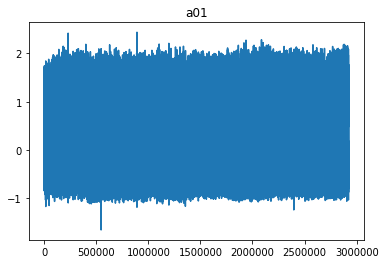

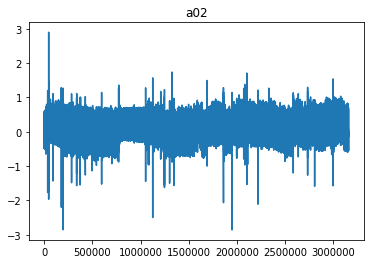

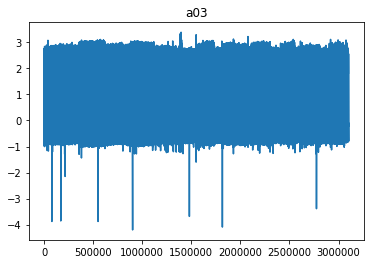

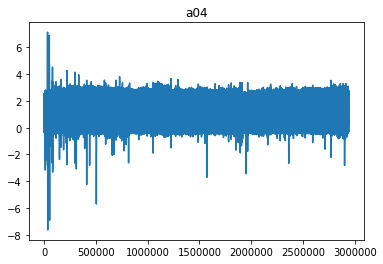

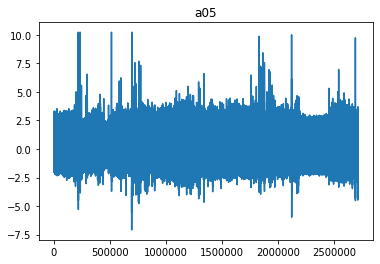

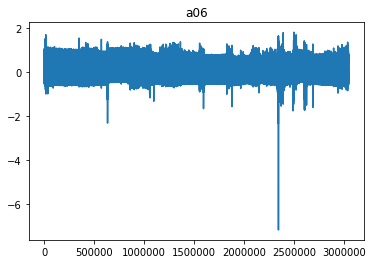

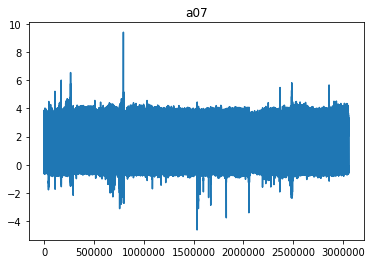

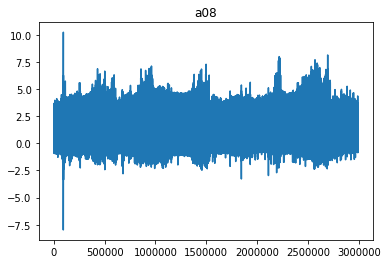

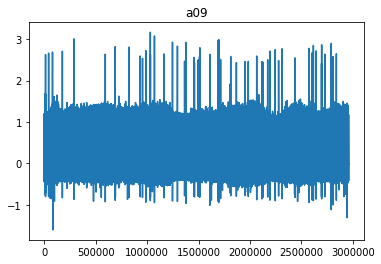

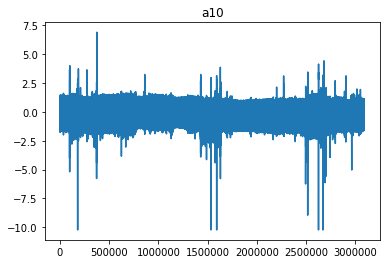

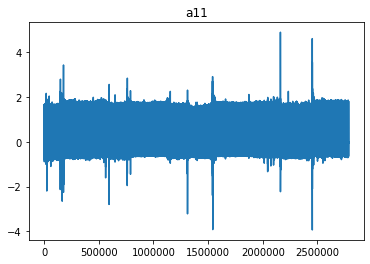

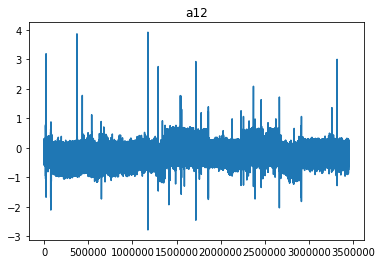

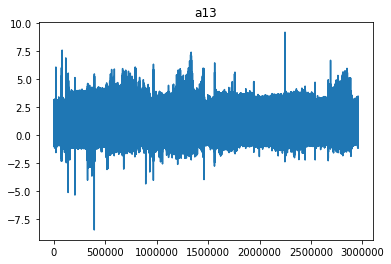

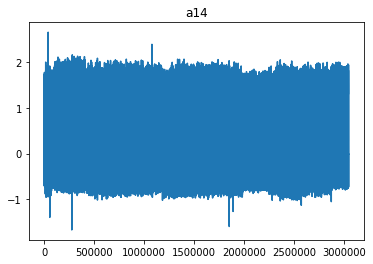

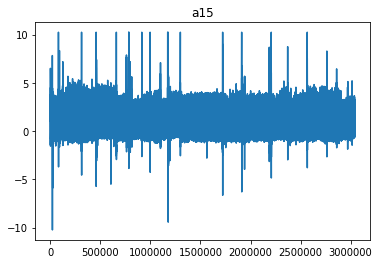

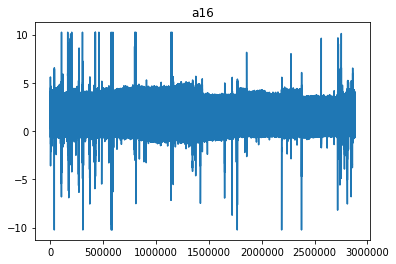

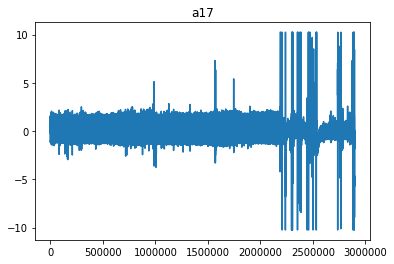

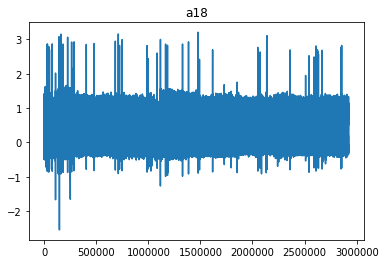

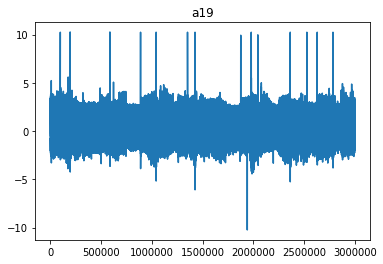

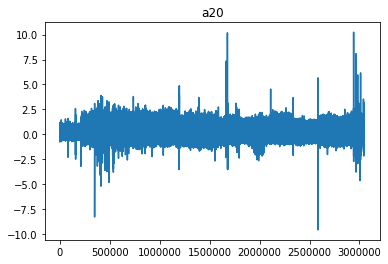

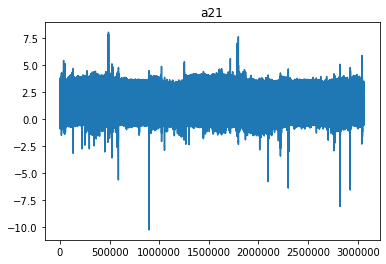

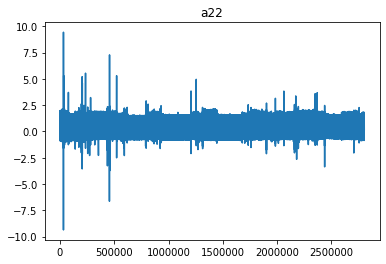

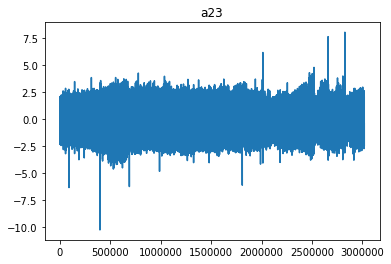

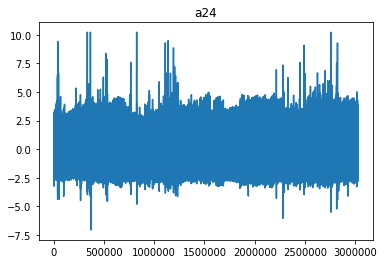

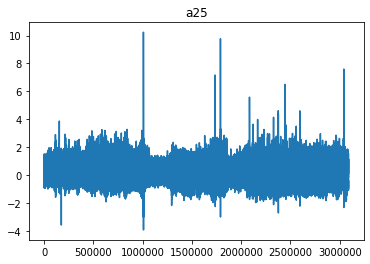

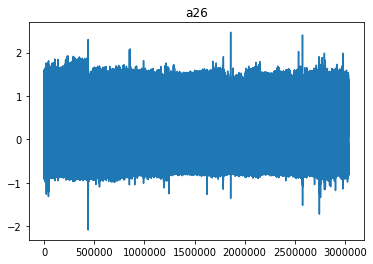

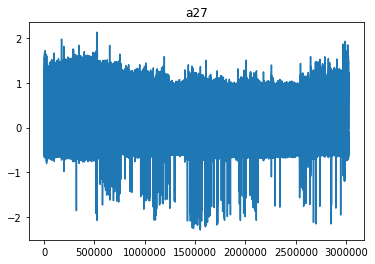

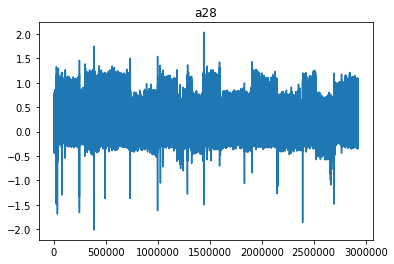

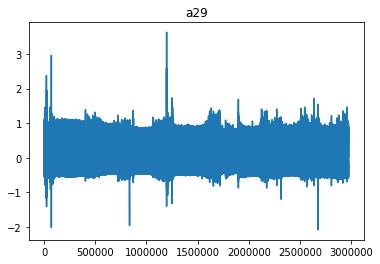

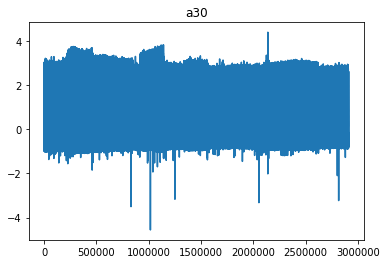

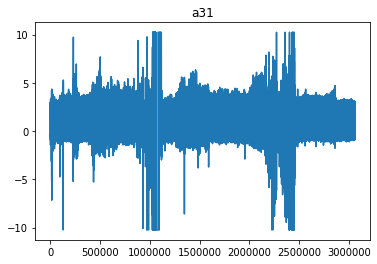

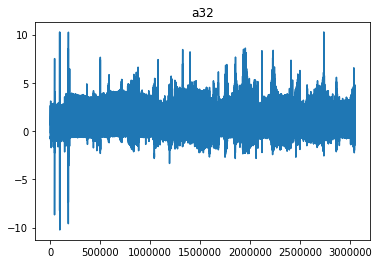

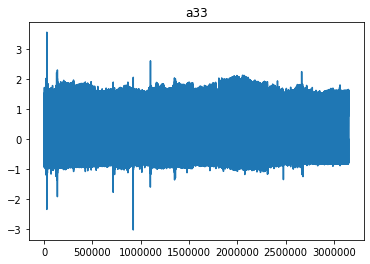

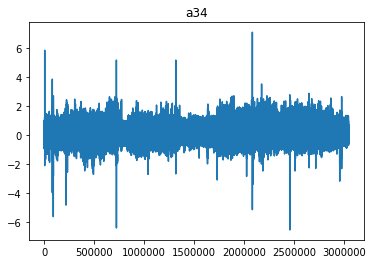

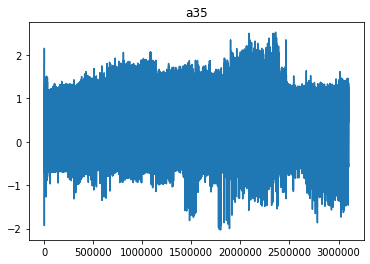

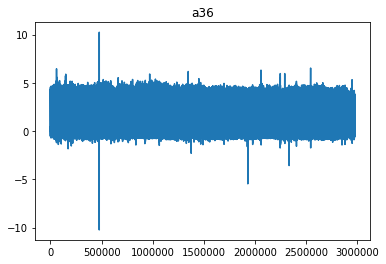

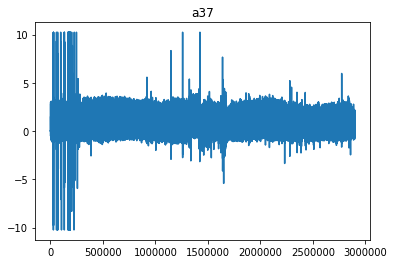

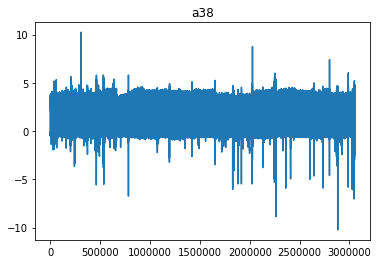

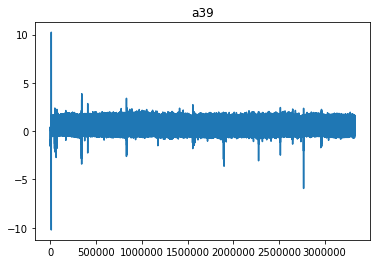

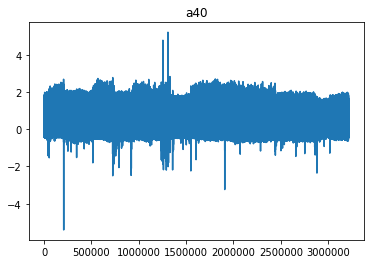

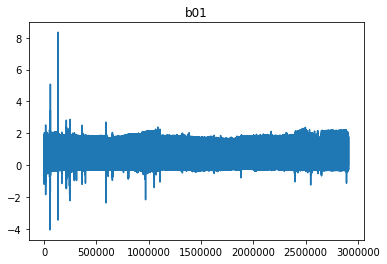

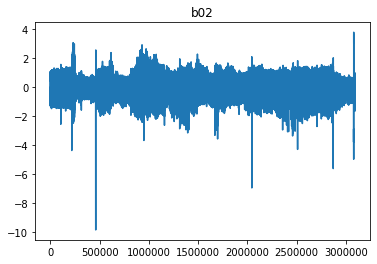

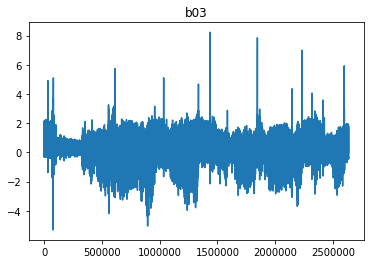

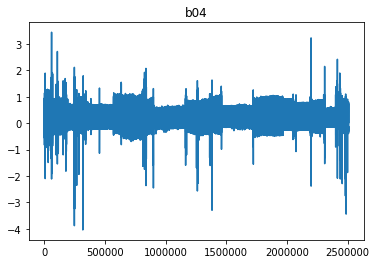

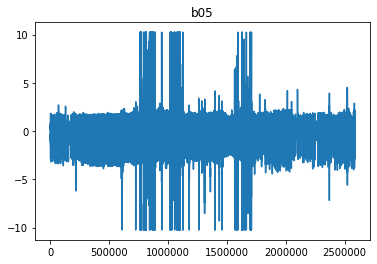

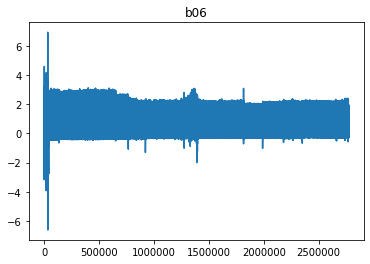

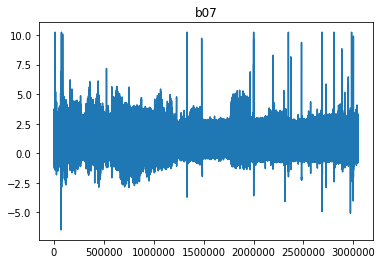

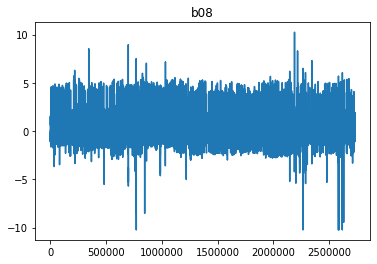

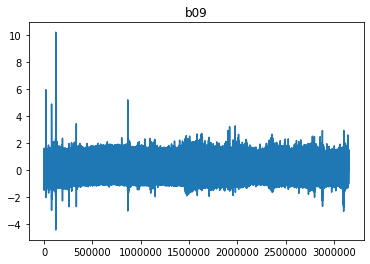

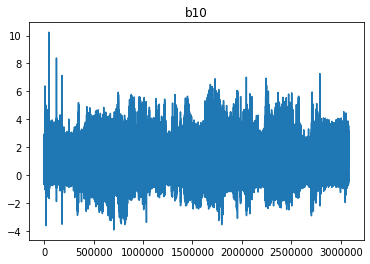

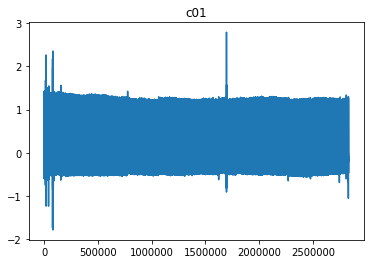

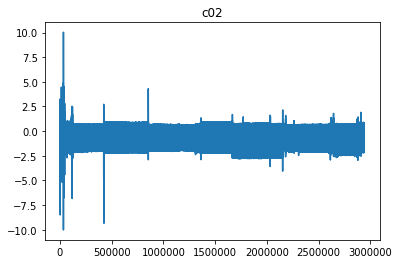

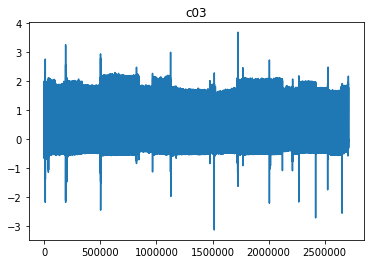

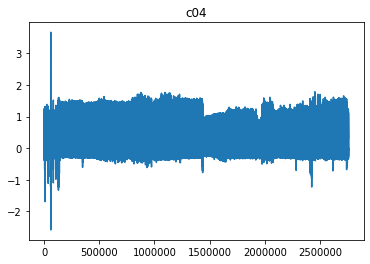

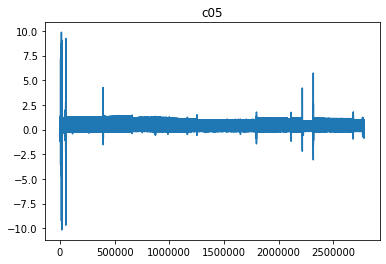

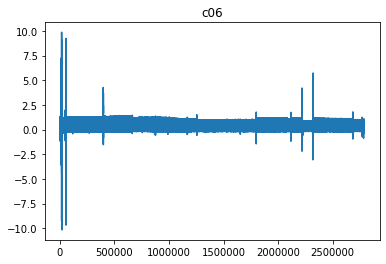

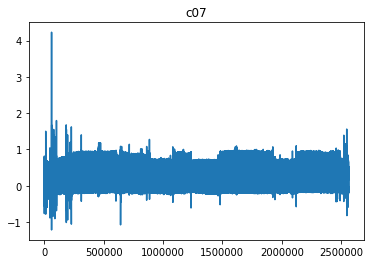

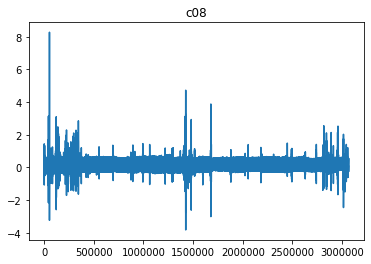

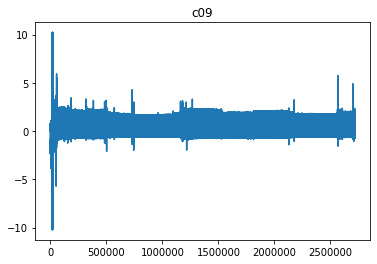

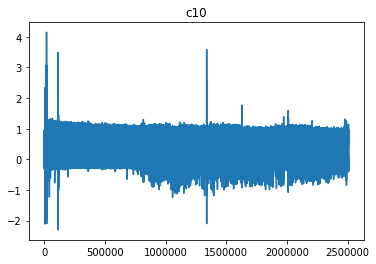

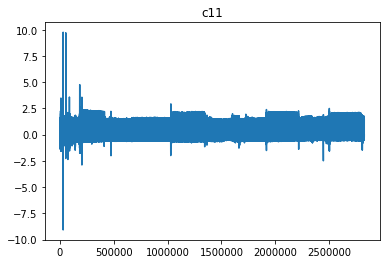

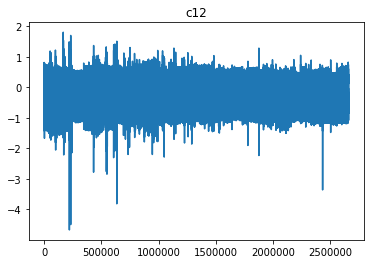

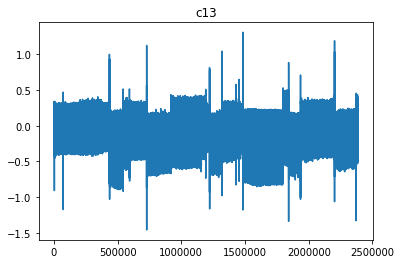

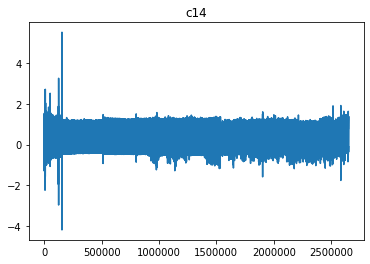

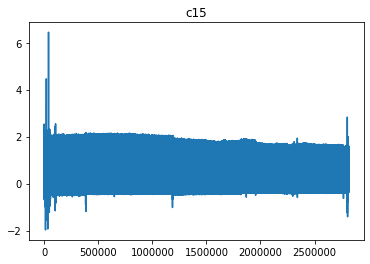

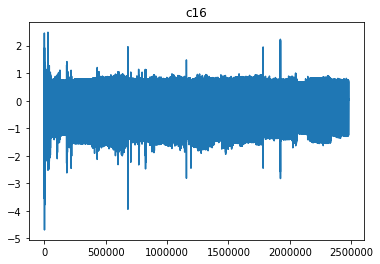

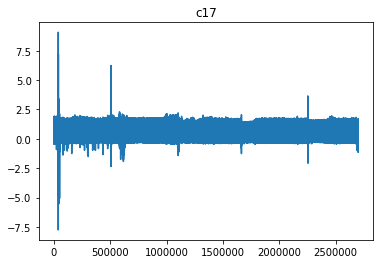

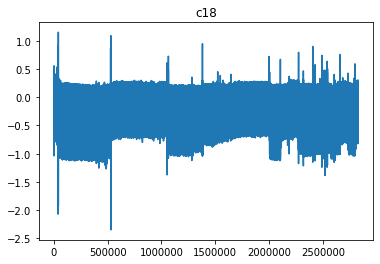

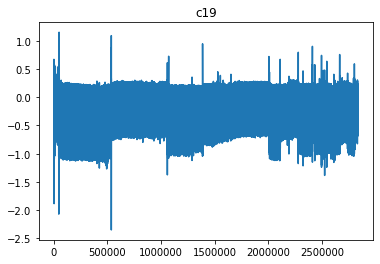

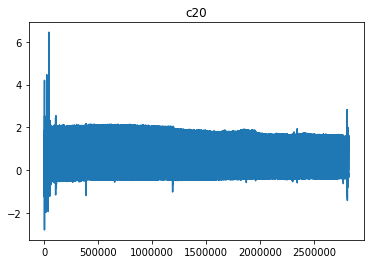

In [12]:
file_full = [f'a{i:02d}' for i in range(1, 41)] +\
    [f'b{i:02d}' for i in range(1, 11)] +\
    [f'c{i:02d}' for i in range(1, 21)]
data_folder = '../data/processed'
for file in file_full:
    with open(f'{data_folder}/{file}.pkl', 'rb') as f:
        res = pickle.load(f)
    
    plt.figure()
    plt.plot(res['ecg'].flatten())
    plt.title(file)
    plt.show()

# 4. Generate heart rate data
- Extract R-R interval from processed ECG data and calculate heart rate

In [ ]:
# Heart rate data for each patient
file_full = [f'a{i:02d}' for i in range(1, 41)] + \
    [f'b{i:02d}' for i in range(1, 11)] + \
    [f'c{i:02d}' for i in range(1, 21)]

for file in file_full:
    print(file)
    with open(f'../data/processed/{file}.pkl', 'rb') as f:
        data = pickle.load(f)
    
    t_hr, hr = [], []
    for minute in range(len(data['apn'])):
        t_hr_, hr_ = util.get_heart_rate(data['ecg'][minute])
        t_hr_ = t_hr_ / 60 + minute # Unit in minutes
        t_hr += list(t_hr_)
        hr += list(hr_)
        
    res = {'hr': np.array(hr), 't': np.array(t_hr)}
    with open(f'../HR_data/{file}.pkl', 'wb') as f:
        pickle.dump(res, f)

a01
a02
a03
a04
a05
a06
a07
a08
a09
a10
a11
a12
a13
a14
a15
a16
a17
a18
a19
a20
a21
a22
a23
a24
a25
a26
a27
a28
a29
a30
a31
a32
a33
a34
a35
a36
a37
a38
a39
a40
b01
b02
b03
b04
b05
b06
b07
b08
b09
b10
c01
c02
c03
c04
c05
c06
c07
c08
c09
c10
c11
c12
c13
c14
c15
c16
c17
c18
c19


# 5. Visualize all heart rate data

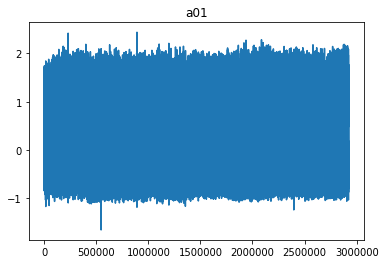

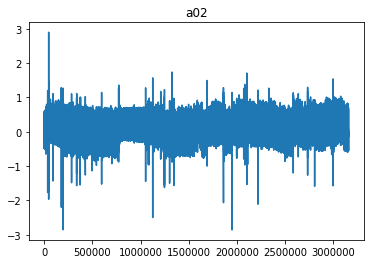

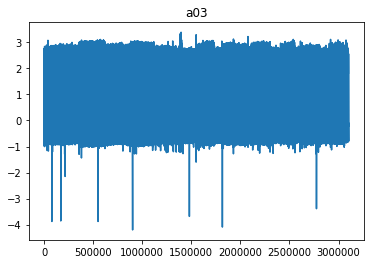

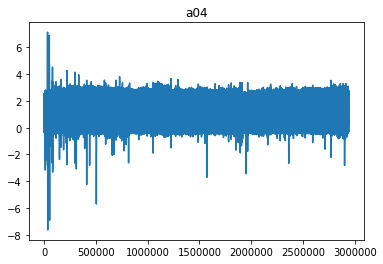

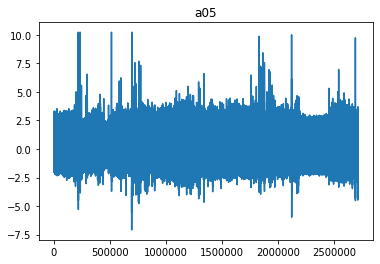

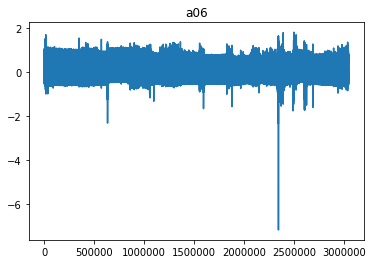

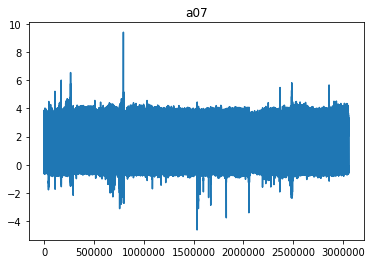

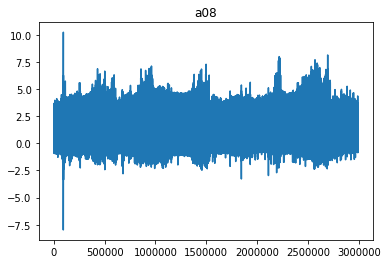

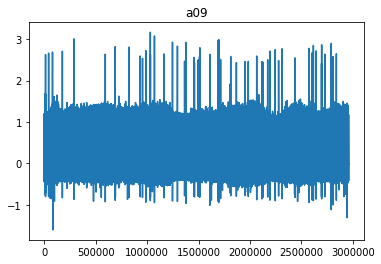

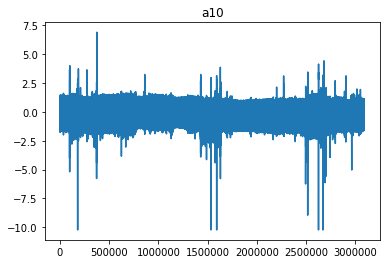

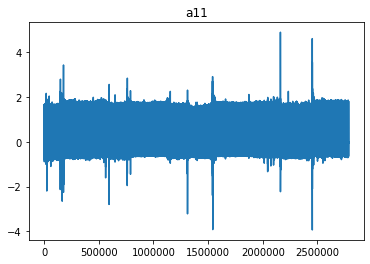

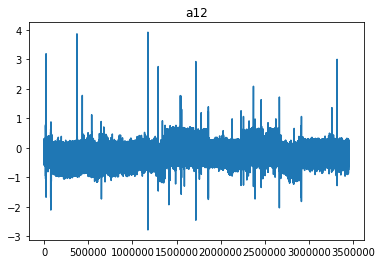

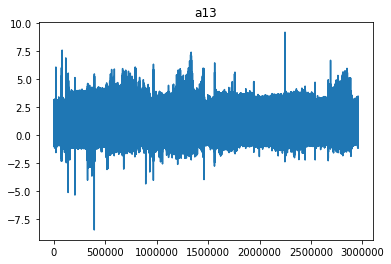

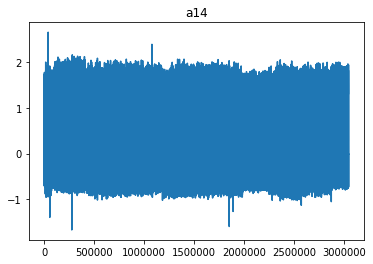

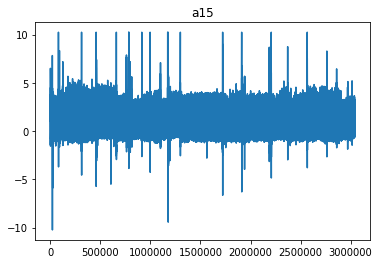

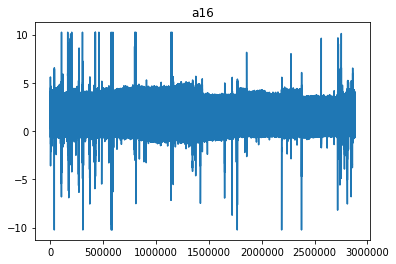

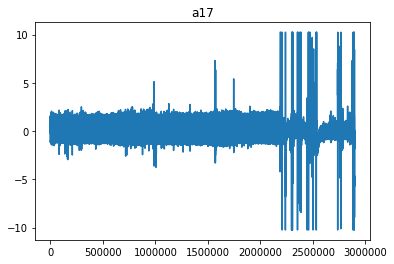

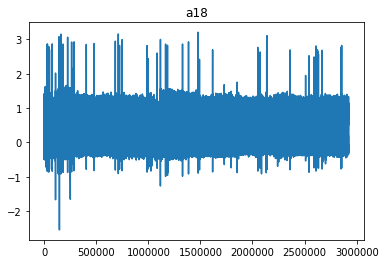

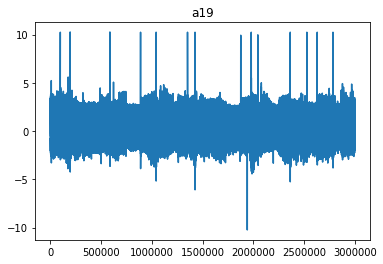

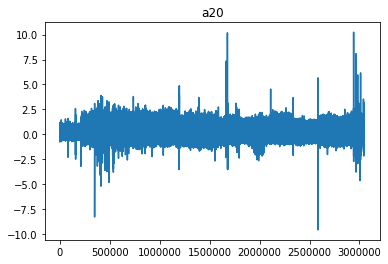

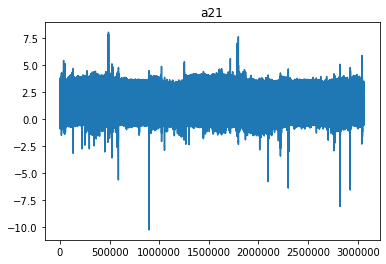

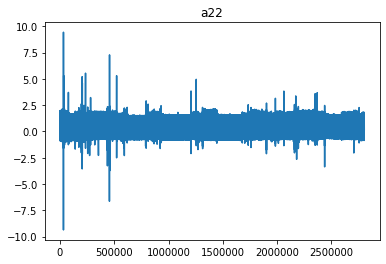

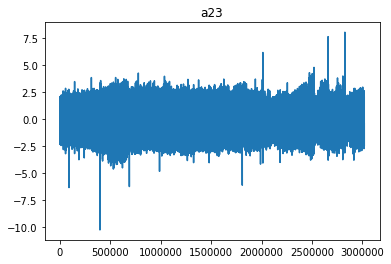

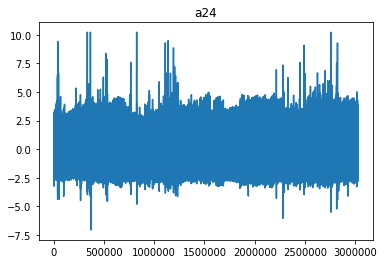

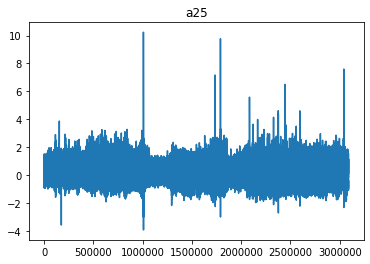

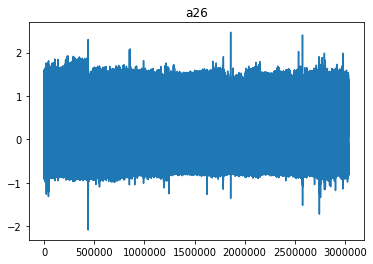

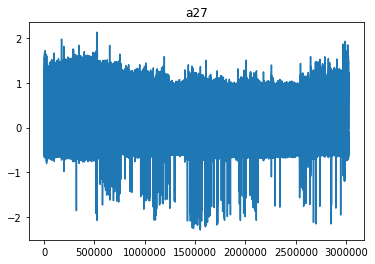

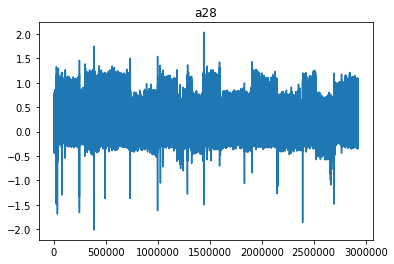

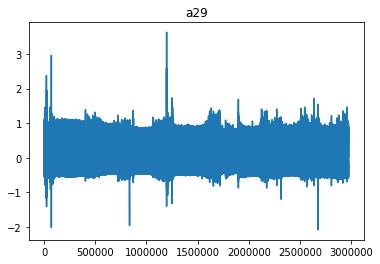

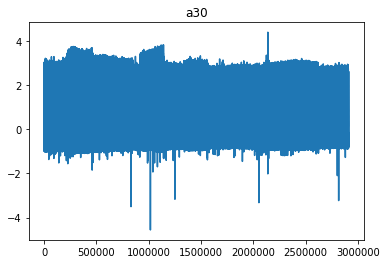

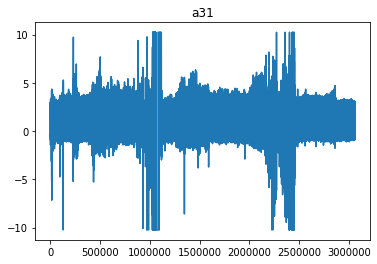

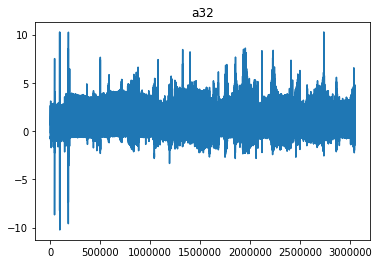

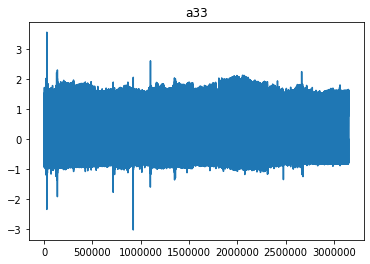

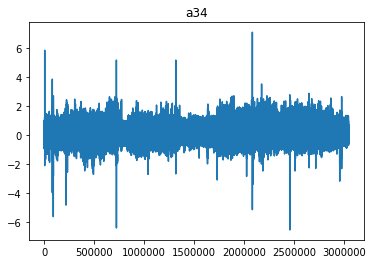

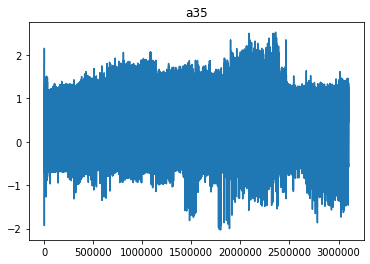

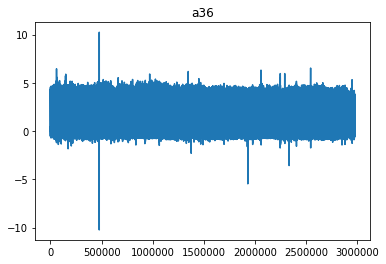

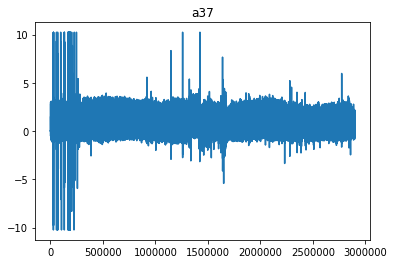

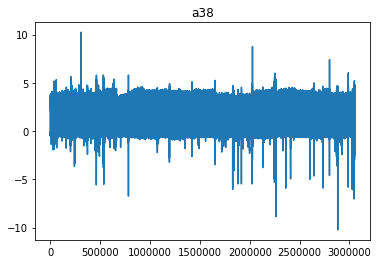

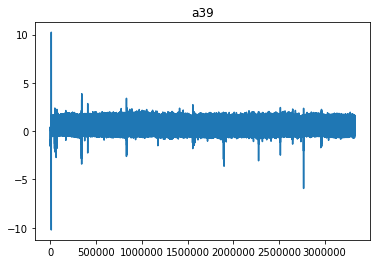

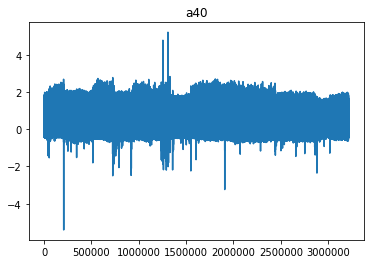

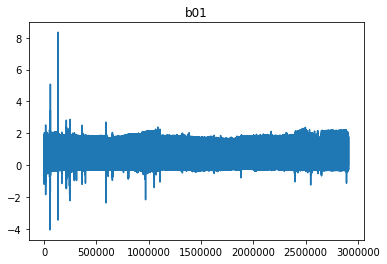

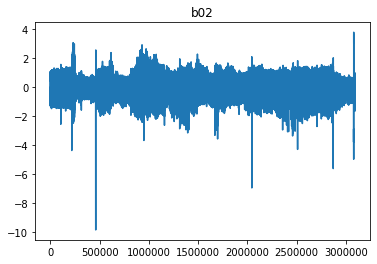

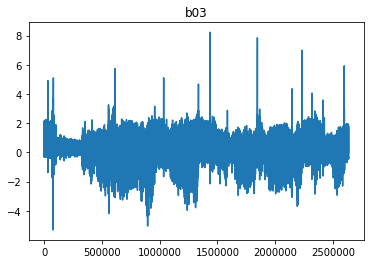

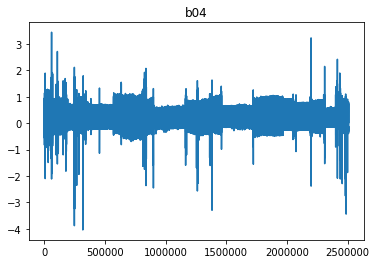

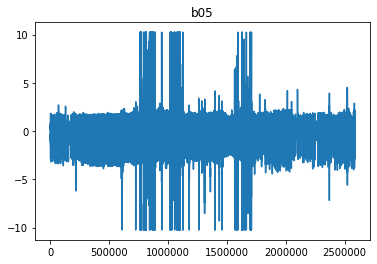

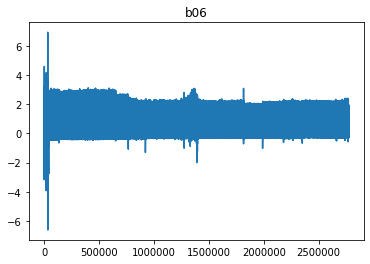

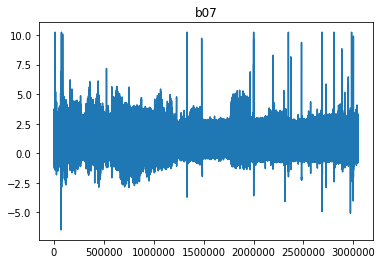

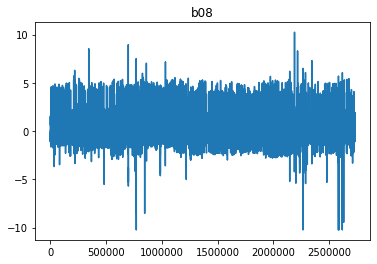

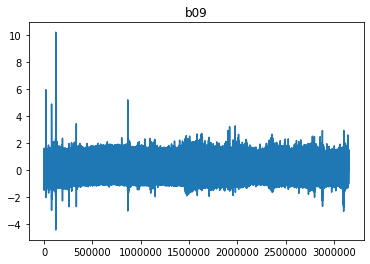

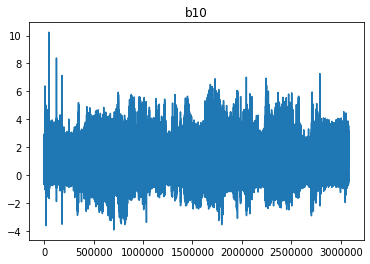

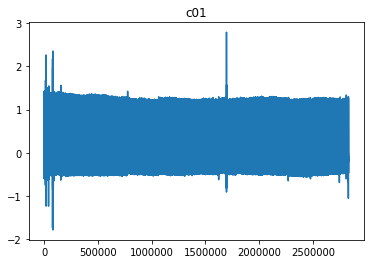

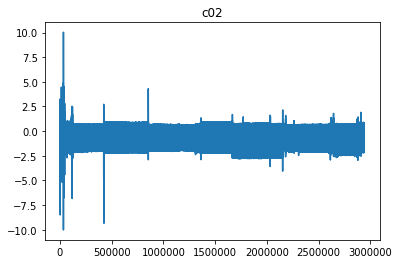

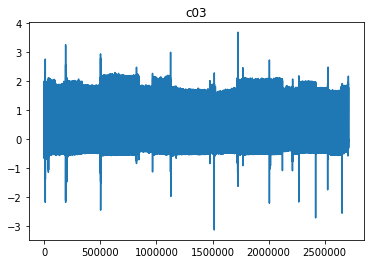

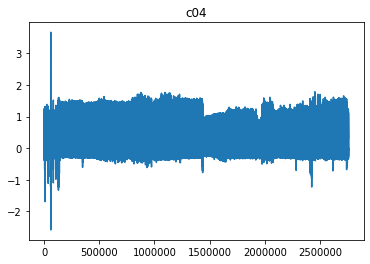

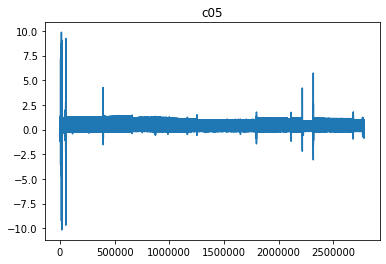

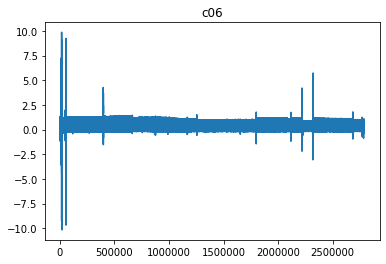

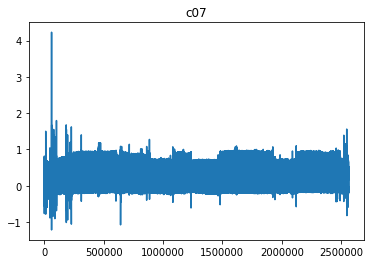

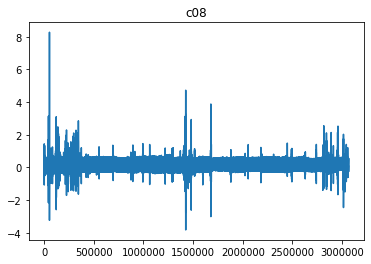

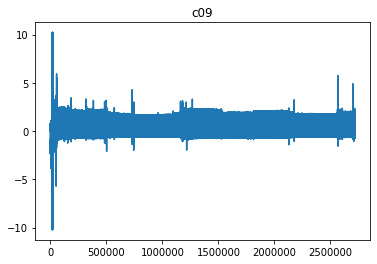

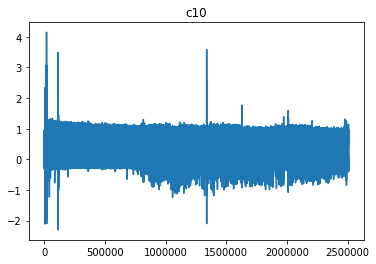

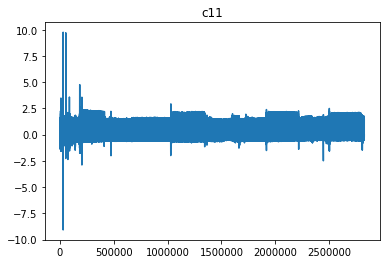

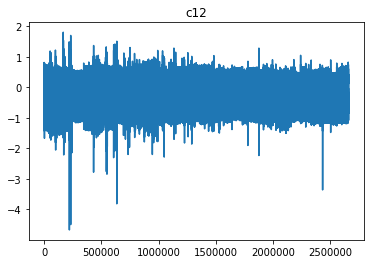

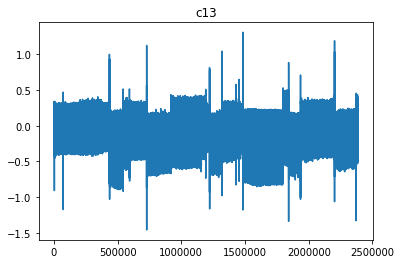

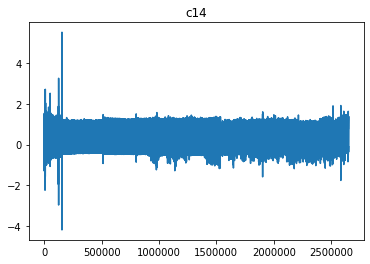

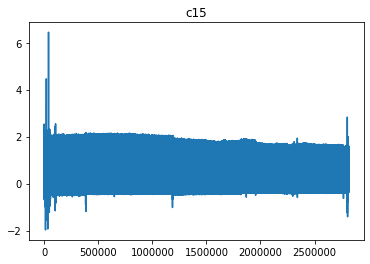

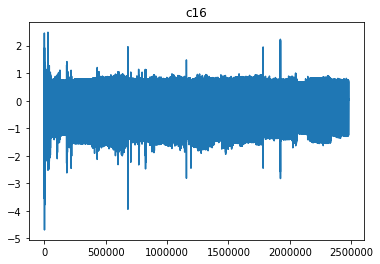

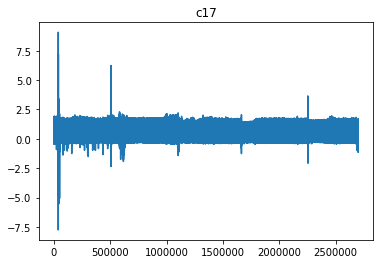

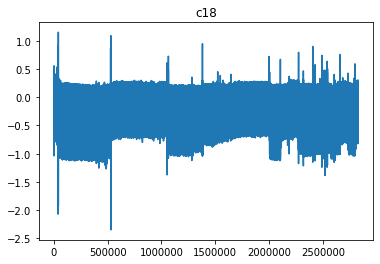

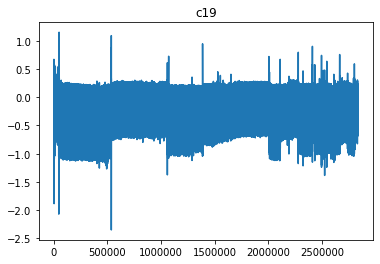

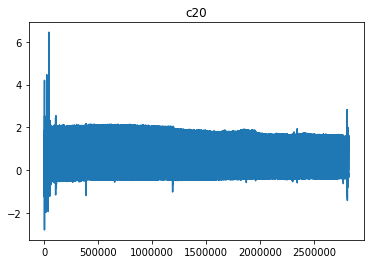

In [12]:
file_full = [f'a{i:02d}' for i in range(1, 41)] +\
    [f'b{i:02d}' for i in range(1, 11)] +\
    [f'c{i:02d}' for i in range(1, 21)]
for file in file_full:
    with open(f'../HR_data/{file}.pkl', 'rb') as f:
        res = pickle.load(f)
    
    plt.figure()
    plt.plot(res['t_hr'], res['hr'])
    plt.ylim([0.5, 2])
    plt.title(file)
    plt.show()

## z_1.1 Raw 
- Convert raw ecg data to pickle files
- ecg, r_peaks, and atfs are reshaped into segments with 1-min long to pair with apn labels

In [ ]:
output_folder = '../data/raw/'
for file in train_full:
    apn, _, t_apn = load.get_apn_train(data_folder + file)
    [apn, ecg, r_peaks, atfs] = load.single_file_res(data_folder, file, apn, t_apn[-1])
    
    # Save result
    res = {'ecg': ecg, 'apn': apn, 'r_peaks': r_peaks, 'atfs': atfs}
    with open(f'{output_folder}/{file}.pkl', 'wb') as f:
        pickle.dump(res, f)

## z_2.2 Raw

In [ ]:
output_folder = '../data/raw/'
with open(f'{data_folder}/event-2-answers.pkl', 'rb') as f:
    apns = pickle.load(f)
    
for file, apn in zip(test_full, apns):
    t_end = 60 * (len(apn) - 1)
    [apn, ecg, r_peaks, atfs] = load.single_file_res(data_folder, file, apn, t_end)
    
    # Save result
    res = {'ecg': ecg, 'apn': apn, 'r_peaks': r_peaks, 'atfs': atfs}
#     with open(f'{output_folder}/{file}.pkl', 'wb') as f:
#         pickle.dump(res, f)